# 인물사진을 만들어 보자😊

In [2]:
import os
import urllib  # 웹에서 데이터를 다운로드할 때 사용
import cv2  # OpenCV 라이브러리로 이미지를 처리하기 위해 필요
import numpy as np
from pixellib.semantic import semantic_segmentation  # 시맨틱 세그멘테이션을 편하게 사용할 수 있는 라이브러리
from matplotlib import pyplot as plt

## 1. 인물모드 사진😃

Invalid SOS parameters for sequential JPEG


(3568, 2940, 3)


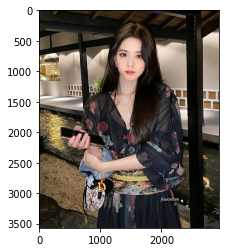

In [2]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/jisoo.jpg'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [5]:
# PixelLib에서 제공해 주는 모델을 다운로드
# 저장할 파일 이름을 결정
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

# PixelLib가 제공하는 모델의 url
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# 다운로드를 시작
urllib.request.urlretrieve(model_url, model_file)

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7fa1140695b0>)

In [5]:
# 사용할 세그멘테이션 모델을 생성
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [6]:
# 모델에 이미지를 입력
segvalues, output = model.segmentAsPascalvoc(img_path)

In [7]:
# PASCAL VOC 데이터의 라벨 종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

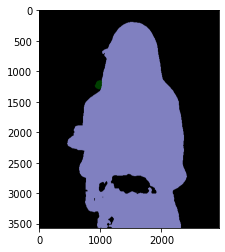

In [8]:
plt.imshow(output)  # output에는 세그멘테이션이 된 결과가 각각 다른 색상으로 담겨있음
plt.show()

In [9]:
segvalues  # segvalues에는 class_ids와 masks가 있음

{'class_ids': array([ 0, 15, 16]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [10]:
for class_id in segvalues['class_ids']:  # class_ids를 통해 어떤 물체가 담겨 있는지 알 수 있음
    print(LABEL_NAMES[class_id])

background
person
pottedplant


In [11]:
# 아래 코드를 이해하지 않아도 좋습니다
# PixelLib에서 그대로 가져온 코드입니다
# 주목해야 할 것은 생상 코드 결과물이예요!
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [12]:
colormap[15]  # 사람을 나타내는 15번째 색상

array([192, 128, 128])

In [13]:
seg_color = (128,128,192)  # output 이미지는 BGR 순서이고 colormap은 RGB 순서이므로 색상 값은 순서를 바꿔 줘야 함

(3568, 2940)


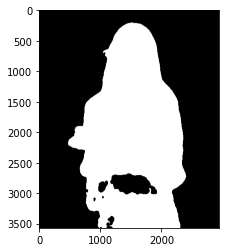

In [14]:
# seg_color로만 이루어진 마스크를 만들어 보기
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

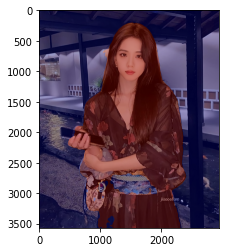

In [15]:
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

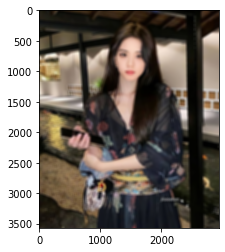

In [16]:
# 배경 흐리게 만들기
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_orig_blur = cv2.blur(img_orig, (50,50))  
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

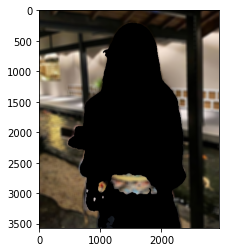

In [17]:
# 배경만 추출
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)  # 이미지 반전
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

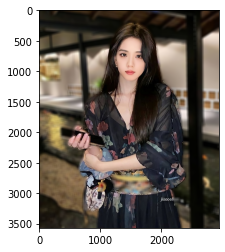

In [18]:
# 배경 영상과 사람 영상을 합치기
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)  # np.where(조건, 참일때, 거짓일때)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

## 2. 고양이 이미지💕

(1133, 2024, 3)


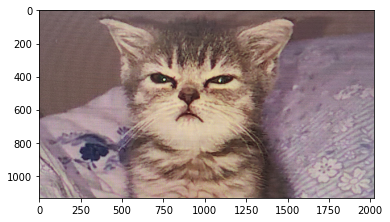

In [19]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/cat.jpg'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

귀엽다

In [20]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

segvalues, output = model.segmentAsPascalvoc(img_path)

In [21]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

In [25]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[8]

array([64,  0,  0])

In [26]:
seg_color = (0,0,64)

(1133, 2024)


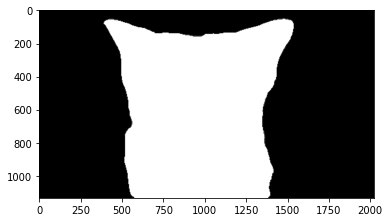

In [27]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

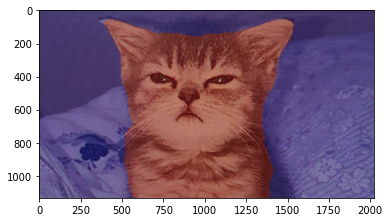

In [28]:
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

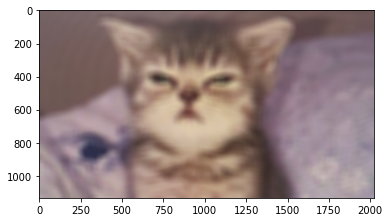

In [29]:
img_orig_blur = cv2.blur(img_orig, (50,50))  
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

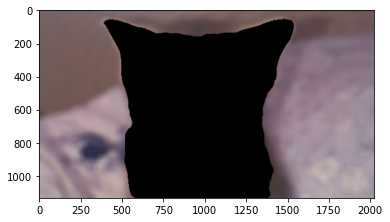

In [30]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

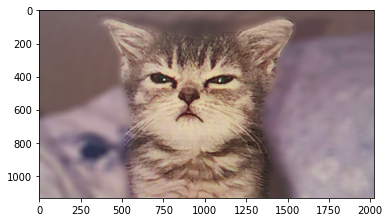

In [31]:
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

## 3. 배경전환 크로마키 사진😎

In [36]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/bg1.jpg'  
img_bg1 = cv2.imread(img_path) 

print(img_bg1.shape)

(1079, 1920, 3)


In [37]:
target_size = img_orig.shape[:2][::-1]
resized_bg1_image = cv2.resize(img_bg1, target_size)
print(resized_bg1_image.shape)

(1133, 2024, 3)


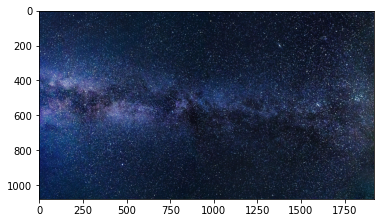

In [40]:
plt.imshow(cv2.cvtColor(img_bg1, cv2.COLOR_BGR2RGB))
plt.show()

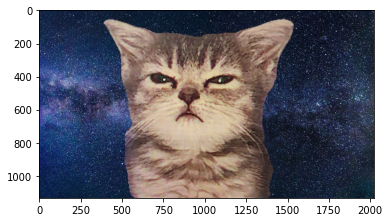

In [39]:
img_concat = np.where(img_mask_color==255, img_orig, resized_bg1_image)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

우주 고양이

# 😣인물모드 사진에서의 문제점

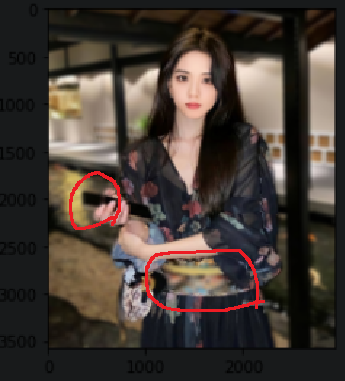
손에 들고있는 핸드폰이나 옷의 허리 부분을 사람부분이라고 인식하지 못함.

# 🤔해결 방법 제안

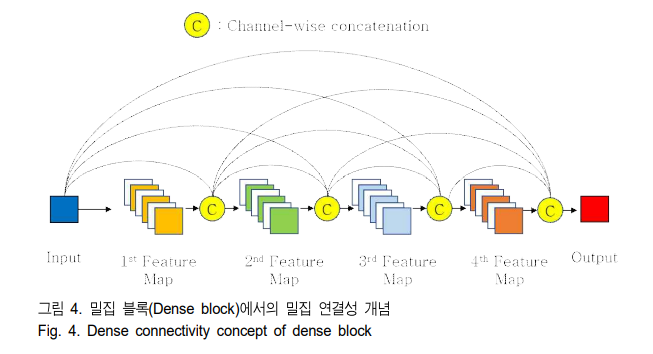
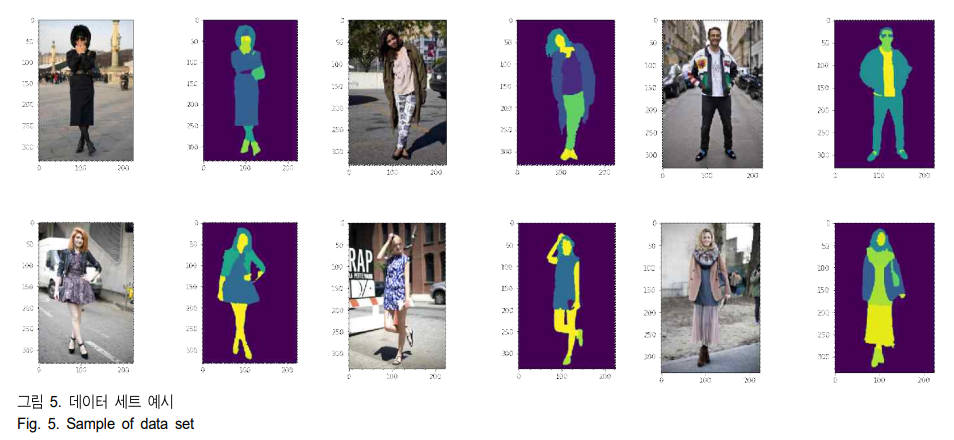
[논문 출처](https://www.koreascience.or.kr/article/JAKO201911338887353.pdf)

* 위와 같이 밀집 연관성 개념을 추가한 DenseNet기반 시멘틱 세그멘테이션 아키텍처를 사용하여 인물 영역을 효과적으로 추론할 수 있음
* 의류 패턴의 인식 오류, 옷 색상간의 유사성 판단, 배경과의 혼선등의 문제 해결을위하여 다운샘플링 및 업샘플링 과정에 밀집 연결성(Denseconnectivity)이라는 전체 아키텍처의 계층 간 완전한 연결 개념을 추가함으로써 오브젝트의 디테일을 보강한다.
* 추후 CRF(Conditional randomfields)와 같은 후처리 기법과 더 많은 학습 데이터를 확보하여 최적화를 실시함으로써 성능 향상이 가능할 것으로 보임.

# 회고🤔
* 지난 스티커앱 실습에 이어 두번째 이미지 처리 실습을 진행해 보았다. 처음보다는 익숙해진것도 같지만 아직 많이 미숙하고 배울것이 산더미다. 그래도 자연어 처리보다는 이미지가 더 재미있고 직관적인 것 같다. 테니스에서 여러대의 초고속 카메라로 촬영하여 공의 3D궤적영상을 만들어내는 Hawkeye 기술에 관심이 있는데, 영상 처리 모델도 배워서 관련 실습도 해보고 싶다.